In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import PIL
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score as CH 
from sklearn.cluster import AgglomerativeClustering as AC

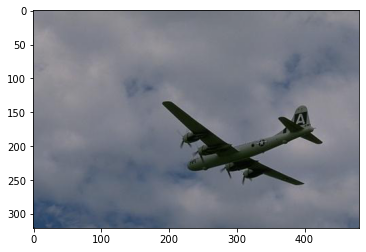

In [3]:
# Reading image of plane
plane_img = mpimg.imread('3096_colorPlane.jpg')
plane_img = plane_img.astype(np.uint8)
plt.imshow(plane_img)

In [4]:
# Splitting red, blue, green values of the image
b,g,r = cv2.split(plane_img)
blue = np.asarray(b).reshape(154401,)
green = np.asarray(g).reshape(154401,)
red = np.asarray(r).reshape(154401,)

horizontal = list()
vertical = list()
for i in range(plane_img.shape[0]):
    for j in range(plane_img.shape[1]): 
        horizontal.append(i) 
        vertical.append(j)
x=np.asarray(horizontal).reshape(154401,)
y=np.asarray(vertical).reshape(154401,)

In [5]:
# Final 5 dimensional feature vector with horizontal co-ordinate of pixel, vertical co-ordinate, Red, Blue and Green values
plane_5d=pd.DataFrame([])
plane_5d["x"]= x
plane_5d["y"]= y
plane_5d["R"] = red
plane_5d["G"] = green
plane_5d["B"] = blue
plane_5d.head()
plane_5d.tail()

,x,y,R,G,B
154396,320,476,115,98,85
154397,320,477,116,99,86
154398,320,478,114,97,84
154399,320,479,110,93,80
154400,320,480,74,64,54


In [6]:
#Normalizing
scaler = MinMaxScaler()
plane_normal_df=pd.DataFrame(scaler.fit_transform(plane_5d))
plane_normal_df.columns=plane_5d.columns

In [7]:
#PCA
plane_pca = PCA(n_components=5)
pca_ = plane_pca.fit_transform(plane_normal_df)
plane_pca.explained_variance_ratio_

array([4.38033966e-01, 3.61275719e-01, 1.94996839e-01, 5.50195682e-03,
       1.91519164e-04])

,PC1,PC2,PC3,PC4,PC5
0,-0.563479,0.449462,0.141527,-0.001870,0.002300
1,-0.563314,0.447389,0.141405,-0.001835,0.002297
2,-0.563150,0.445316,0.141283,-0.001800,0.002295
3,-0.557694,0.443201,0.149058,-0.001530,0.002730
4,-0.557530,0.441128,0.148936,-0.001496,0.002727


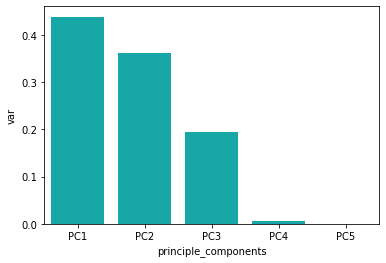

In [8]:
#Visualising the variance represented by the principal components
PC_df = pd.DataFrame({'var':plane_pca.explained_variance_ratio_,'principle_components':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='principle_components',y="var", data=PC_df, color="c")

pca_df = pd.DataFrame(data = pca_,columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pca_df.head()

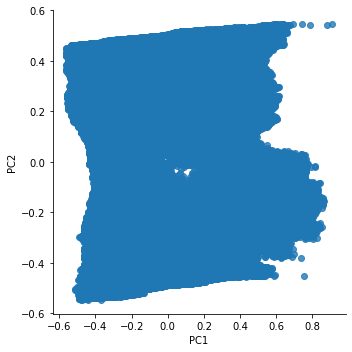

In [9]:
# PCA-based representations of the feature vectors in PC1 and PC2 since they have high explained variance ratio
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False,)

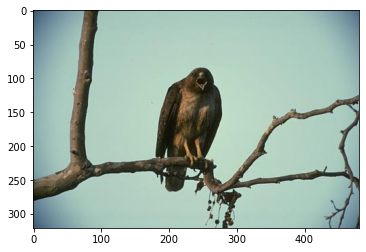

In [10]:
#PCA for bird
bird_img = mpimg.imread('42049_colorBird.jpg')
bird_img = bird_img.astype(np.uint8)
plt.imshow(bird_img)

In [11]:
# Splitting red, blue, green values of the image
b,g,r = cv2.split(bird_img)
blue = np.asarray(b).reshape(154401,)
green = np.asarray(g).reshape(154401,)
red = np.asarray(r).reshape(154401,)

horizontal = list()
vertical = list()
for i in range(bird_img.shape[0]):
    for j in range(bird_img.shape[1]): 
        horizontal.append(i) 
        vertical.append(j)
x=np.asarray(horizontal).reshape(154401,)
y=np.asarray(vertical).reshape(154401,)


In [12]:
# Final 5 dimensional feature vector with horizontal co-ordinate of pixel,␣ 􏰀→vertical co-ordinate, Red, Blue and Green values
bird_5d=pd.DataFrame([])
bird_5d["x"]= x
bird_5d["y"]= y
bird_5d["R"] = red
bird_5d["G"] = green
bird_5d["B"] = blue
bird_5d.head()
bird_5d.tail()

,x,y,R,G,B
154396,320,476,55,54,44
154397,320,477,54,50,45
154398,320,478,35,27,27
154399,320,479,38,27,29
154400,320,480,128,102,88


In [13]:
#Normalizing
scaler = MinMaxScaler()
bird_normal_df=pd.DataFrame(scaler.fit_transform(bird_5d))
bird_normal_df.columns=bird_5d.columns

In [14]:
#PCA
bird_pca = PCA(n_components=5)
pca_1 = bird_pca.fit_transform(bird_normal_df)
bird_pca.explained_variance_ratio_

array([4.64003841e-01, 2.74424861e-01, 2.54012794e-01, 7.10838238e-03,
       4.50121605e-04])

,PC1,PC2,PC3,PC4,PC5
0,0.511214,0.711108,0.134138,-0.152850,-0.027396
1,0.504150,0.709663,0.133438,-0.152206,-0.027750
2,0.497086,0.708219,0.132739,-0.151563,-0.028105
3,0.483431,0.706733,0.129874,-0.150271,-0.028803
4,0.469777,0.705247,0.127008,-0.148979,-0.029502


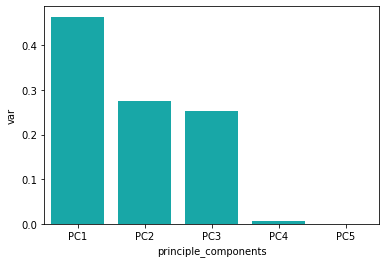

In [15]:
#Visualising the variance represented by the principal components
PC_df_bird = pd.DataFrame({'var':bird_pca.explained_variance_ratio_,'principle_components':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='principle_components',y="var", data=PC_df_bird, color="c")

pca_df_bird = pd.DataFrame(data = pca_1,columns = ['PC1','PC2','PC3','PC4','PC5'])
pca_df_bird.head()

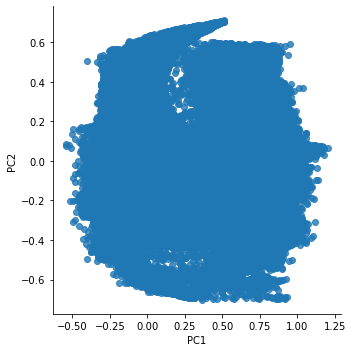

In [16]:
# PCA-based representations of the feature vectors in PC1 and PC2 since they␣ 􏰀→have high explained variance ratio
sns.lmplot( x="PC1", y="PC2", data=pca_df_bird, legend='full', palette="Set1", fit_reg=False,)

In [17]:
#TSNE
def get_tsne_vis(df,p):
    tsne = TSNE(n_components=2, perplexity=p).fit_transform(df) 
    tsne_df = pd.DataFrame(data = tsne,columns = ['C1', 'C2']) 
    sns.scatterplot(x="C1", y="C2", palette=sns.color_palette("hls", 10), data=tsne_df, legend="full", alpha=0.3)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


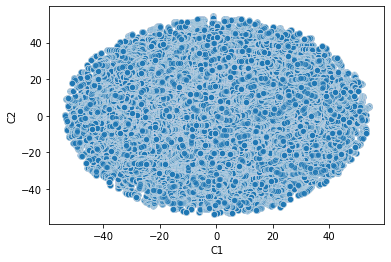

In [21]:
get_tsne_vis(plane_normal_df,15)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


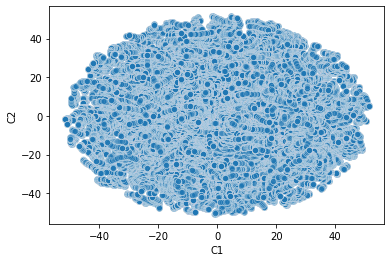

In [22]:
get_tsne_vis(plane_normal_df,30)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


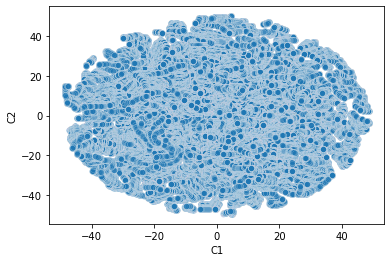

In [23]:
get_tsne_vis(plane_normal_df,50)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


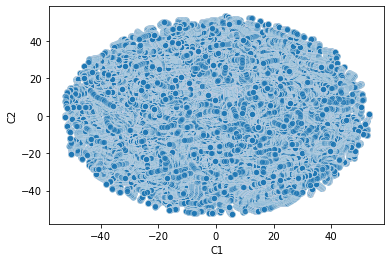

In [24]:
get_tsne_vis(bird_normal_df,15)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


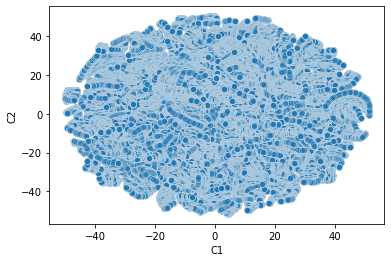

In [25]:
get_tsne_vis(bird_normal_df,30)

/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/nikhilg/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


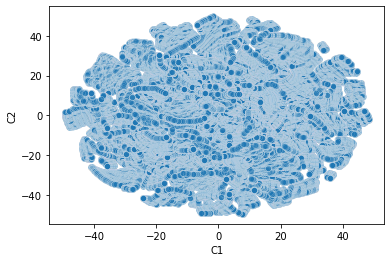

In [26]:
get_tsne_vis(bird_normal_df,50)

In [18]:
#K Mean Clustering
def get_kmeans(data, k,image):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data) 
    labels = kmeans.labels_
    labels = np.asarray(labels).reshape(321,481)
    return labels

Silhouette_score for k=2:  0.3395033919879629
CH score for k=2:  77052.04537381661


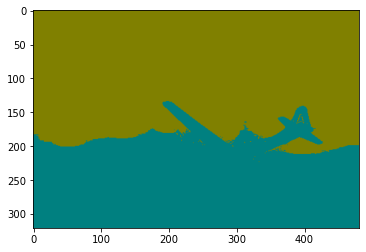

In [19]:
#k=2 plane
plane_labels2 = get_kmeans(plane_normal_df, 2, plane_img) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(plane_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(plane_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = plane_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=2: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=3:  0.34545709347516435
CH score for k=3:  85239.57031530983


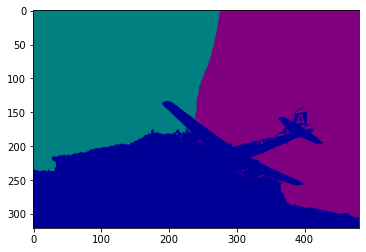

In [27]:
#k=3 plane
plane_labels3 = get_kmeans(plane_normal_df, 3, plane_img) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(plane_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(plane_labels3[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(plane_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = plane_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=3: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=4:  0.3890774432014466
CH score for k=4:  102536.3431669832


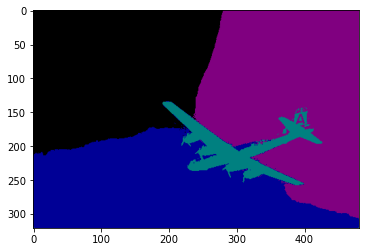

In [28]:
#k=4 plane
plane_labels4 = get_kmeans(plane_normal_df, 4, plane_img) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(plane_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(plane_labels4[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(plane_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(plane_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = plane_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=4: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=5:  0.4108812266272451
CH score for k=5:  129830.96716362184


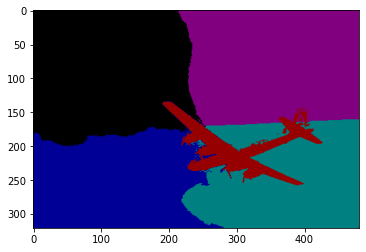

In [29]:
#k=5 plane
plane_labels5 = get_kmeans(plane_normal_df, 5, plane_img) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(plane_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(plane_labels5[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(plane_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(plane_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(plane_labels5[i][j]==4): 
            image[i][j] = [150,0,0]
d = plane_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=5: ", CH(plane_normal_df, d))
plt.imshow(image)

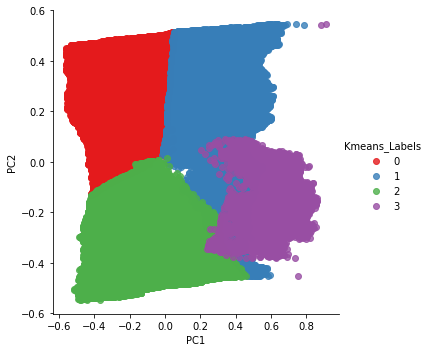

In [30]:
# PCA for k=4 plane
pca_df['Kmeans_Labels']=plane_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False, hue = "Kmeans_Labels" )

Silhouette_score for k=2:  0.46487877326795524
CH score for k=2:  101966.14053570671


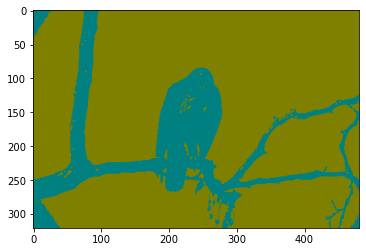

In [31]:
#k=2 bird
bird_labels2 = get_kmeans(bird_normal_df, 2, bird_img) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bird_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bird_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = bird_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=2: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=3:  0.368491277879977
CH score for k=3:  107333.84193977268


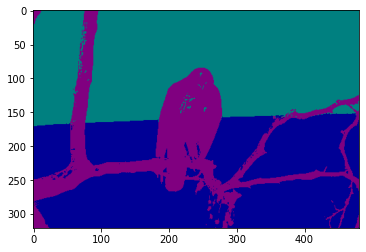

In [32]:
#k=3 bird
bird_labels3 = get_kmeans(bird_normal_df, 3, bird_img) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bird_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bird_labels3[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(bird_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = bird_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=3: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=4:  0.39172154038371265
CH score for k=4:  120414.27051416089


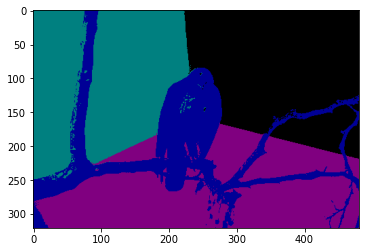

In [33]:
#k=4 bird
bird_labels4 = get_kmeans(bird_normal_df, 4, bird_img) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bird_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(bird_labels4[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(bird_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(bird_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = bird_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=4: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=5:  0.4050943321178397
CH score for k=5:  128906.65313077682


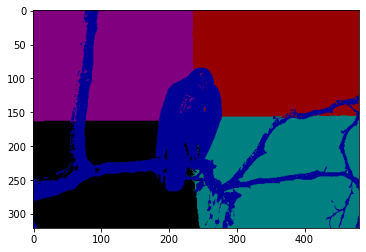

In [34]:
#k=5 bird
bird_labels5 = get_kmeans(bird_normal_df, 5, bird_img) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bird_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(bird_labels5[i][j]==1): 
            image[i][j] = [0,0,150] 
        if(bird_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(bird_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(bird_labels5[i][j]==4): 
            image[i][j] = [150,0,0]
d = bird_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=5: ", CH(bird_normal_df, d))
plt.imshow(image)

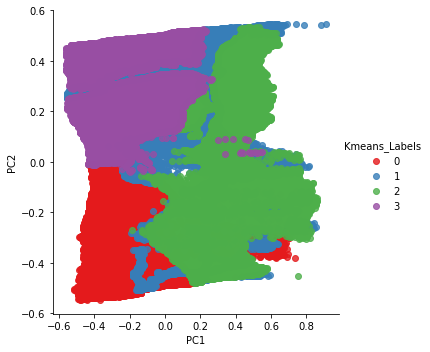

In [36]:
# PCA for k=4 bird
pca_df['Kmeans_Labels']=bird_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False, hue = "Kmeans_Labels" )

In [37]:
#GMM Cluster
def get_gmm(data, k):
    gmm_mixture = GaussianMixture(n_components=k, random_state=0).fit(data) 
    labels = gmm_mixture.predict(data)
    labels = np.asarray(labels).reshape(321,481)
    return labels

Silhouette_score for k=2:  0.3207000805151244
CH score for k=2:  36098.40645823758


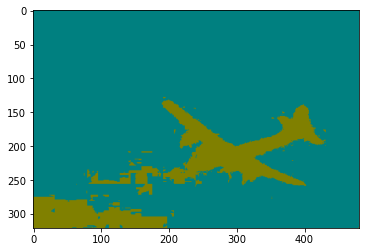

In [38]:
#k=2 plane
pl_gmm_labels2 = get_gmm(plane_normal_df, 2) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_gmm_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(pl_gmm_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = pl_gmm_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=2: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=3:  0.30486961930633094
CH score for k=3:  58093.96698260351


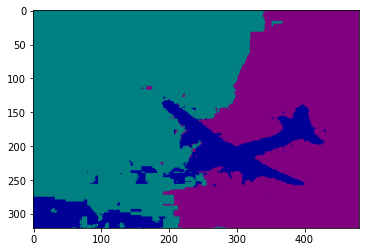

In [39]:
#k=3 plane
pl_gmm_labels3 = get_gmm(plane_normal_df, 3) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_gmm_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(pl_gmm_labels3[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_gmm_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = pl_gmm_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=3: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=4:  0.3185300694697363
CH score for k=4:  67746.28201320177


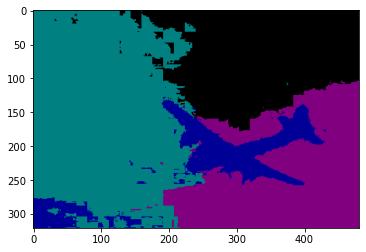

In [40]:
#k=4 plane
pl_gmm_labels4 = get_gmm(plane_normal_df, 4) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_gmm_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(pl_gmm_labels4[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_gmm_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(pl_gmm_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = pl_gmm_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=4: ", CH(plane_normal_df, d))
plt.imshow(image)

Silhouette_score for k=5:  0.35997271769501266
CH score for k=5:  93550.33833769857


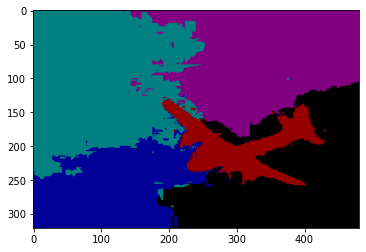

In [41]:
#k=5 plane
pl_gmm_labels5 = get_gmm(plane_normal_df, 5) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_gmm_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(pl_gmm_labels5[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_gmm_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(pl_gmm_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(pl_gmm_labels5[i][j]==4):
            image[i][j] = [150,0,0]
d = pl_gmm_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=5: ", CH(plane_normal_df, d))
plt.imshow(image)

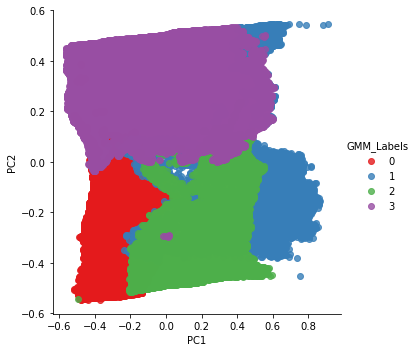

In [42]:
# PCA for k=4 plane
pca_df['GMM_Labels']=pl_gmm_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False, hue = "GMM_Labels" )

Silhouette_score for k=2:  0.3232065407620278
CH score for k=2:  58237.04349082595


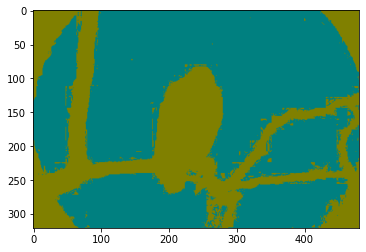

In [43]:
#k=2 bird
bd_gmm_labels2 = get_gmm(bird_normal_df, 2) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_gmm_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bd_gmm_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = bd_gmm_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=2: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=3:  0.26991358350582734
CH score for k=3:  57278.34239854067


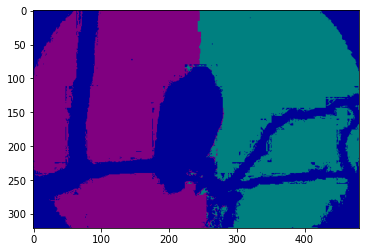

In [44]:
#k=3 bird
bd_gmm_labels3 = get_gmm(bird_normal_df, 3) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_gmm_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bd_gmm_labels3[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_gmm_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = bd_gmm_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=3: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=4:  0.27473941475282265
CH score for k=4:  57359.3448382001


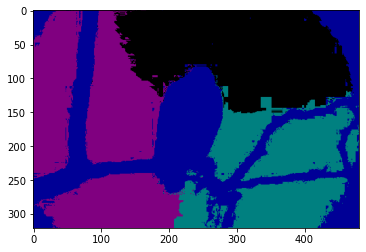

In [45]:
#k=4 bird
bd_gmm_labels4 = get_gmm(bird_normal_df, 4) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_gmm_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(bd_gmm_labels4[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_gmm_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(bd_gmm_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = bd_gmm_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=4: ", CH(bird_normal_df, d))
plt.imshow(image)

Silhouette_score for k=5:  0.2430086932042555
CH score for k=5:  46900.24352351218


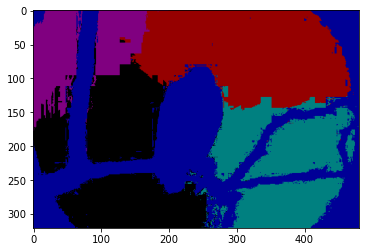

In [46]:
#k=5 bird
bd_gmm_labels5 = get_gmm(bird_normal_df, 5) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_gmm_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(bd_gmm_labels5[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_gmm_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(bd_gmm_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(bd_gmm_labels5[i][j]==4):
            image[i][j] = [150,0,0]
d = bd_gmm_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=5: ", CH(bird_normal_df, d))
plt.imshow(image)

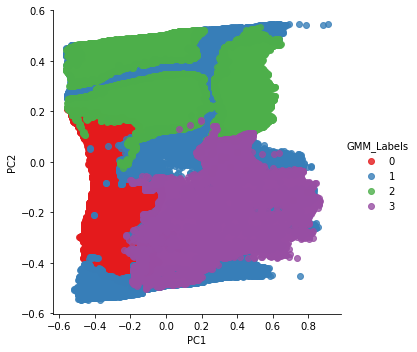

In [47]:
# PCA for k=4 bird
pca_df['GMM_Labels']=bd_gmm_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False, hue = "GMM_Labels" )

In [18]:
#Hierarchical Cluster

def get_hc(data, k):
    hc = AC(n_clusters=k).fit(data)
    labels = hc.labels
    labels = np.asarray(labels).reshape(321,481) 
    return labels

In [20]:
#k=2 plane
pl_hc_labels2 = get_hc(plane_normal_df,2) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_hc_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(pl_hc_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = pl_hc_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=2: ", CH(plane_normal_df, d))
plt.imshow(image)

In [19]:
#k=3 plane
pl_hc_labels3 = get_hc(plane_normal_df,3) 
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_hc_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(pl_hc_labels3[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_hc_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = pl_hc_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=3: ", CH(plane_normal_df, d))
plt.imshow(image)

In [ ]:
#k=4 plane
pl_hc_labels4 = get_hc(plane_normal_df,4)
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_hc_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(pl_hc_labels4[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_hc_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(pl_hc_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = pl_hc_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=4: ", CH(plane_normal_df, d))
plt.imshow(image)

In [ ]:
#k=5 plane
pl_hc_labels5 = get_hc(plane_normal_df,5)
image = plane_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(pl_hc_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(pl_hc_labels5[i][j]==1):
            image[i][j] = [0,0,150] 
        if(pl_hc_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(pl_hc_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(pl_hc_labels5[i][j]==4):
            image[i][j] = [150,0,0]
d = pl_hc_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(plane_normal_df,d ))
print("CH score for k=5: ", CH(plane_normal_df, d))
plt.imshow(image)

In [ ]:
# PCA for k=4 plane
pca_df['HC_Labels']=pl_hc_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df, legend='full', palette="Set1", fit_reg=False, hue = "HC_Labels" )

In [ ]:
#k=2 bird
bd_hc_labels2 = get_hc(bird_normal_df,2) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_hc_labels2[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bd_hc_labels2[i][j]==1):
            image[i][j] = [128,128,0]
d = bd_hc_labels2.reshape(154401,)
print("Silhouette_score for k=2: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=2: ", CH(bird_normal_df, d))
plt.imshow(image)

In [ ]:
#k=3 bird
bd_hc_labels3 = get_hc(bird_normal_df,3) 
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_hc_labels3[i][j]==0):
            image[i][j] = [0,128,128] 
        if(bd_hc_labels3[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_hc_labels3[i][j]==2):
            image[i][j] = [128,0,128]
d = bd_hc_labels3.reshape(154401,)
print("Silhouette_score for k=3: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=3: ", CH(bird_normal_df, d))
plt.imshow(image)

In [ ]:
#k=4 bird
bd_hc_labels4 = get_hc(bird_normal_df,4)
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_hc_labels4[i][j]==0):
            image[i][j] = [0,0,0] 
        if(bd_hc_labels4[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_hc_labels4[i][j]==2):
            image[i][j] = [128,0,128] 
        if(bd_hc_labels4[i][j]==3):
            image[i][j] = [0,128,128]
d = bd_hc_labels4.reshape(154401,)
print("Silhouette_score for k=4: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=4: ", CH(bird_normal_df, d))
plt.imshow(image)

In [ ]:
#k=5 bird
bd_hc_labels5 = get_hc(bird_normal_df,5)
image = bird_img
for i in range(image.shape[0]):
    for j in range(image.shape[1]): 
        if(bd_hc_labels5[i][j]==0):
            image[i][j] = [128,0,128] 
        if(bd_hc_labels5[i][j]==1):
            image[i][j] = [0,0,150] 
        if(bd_hc_labels5[i][j]==2):
            image[i][j] = [0,0,0] 
        if(bd_hc_labels5[i][j]==3):
            image[i][j] = [0,128,128] 
        if(bd_hc_labels5[i][j]==4):
            image[i][j] = [150,0,0]
d = bd_hc_labels5.reshape(154401,)
print("Silhouette_score for k=5: ",silhouette_score(bird_normal_df,d ))
print("CH score for k=5: ", CH(bird_normal_df, d))
plt.imshow(image)

In [ ]:
# PCA for k=4 bird
pca_df1['HC_Labels']=bd_hc_labels4.reshape(154401,)
sns.lmplot( x="PC1", y="PC2", data=pca_df1, legend='full', palette="Set1", fit_reg=False, hue = "HC_Labels" )